In [10]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [12]:
# #convert xlsx to csv
p1=pd.read_excel("Manual  Content Analysis.xlsx")
p1.to_csv("Manual Content Analysis.csv", index=False)


In [13]:
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")
# amazon=pd.read_csv("Manual Content Analysis.csv")

In [14]:
amazon.head()

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use


In [15]:
review=amazon['Reviews']

In [64]:
q=amazon["Aspect"]

In [16]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    processed_text = " ".join(filtered_tokens)

    
    return processed_text

In [17]:
processed_series = review.apply(preprocess_text)

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
example=processed_series[10]

In [20]:
example

'complaint concentrator fit perfectly pop middle everything'

In [21]:
sia.polarity_scores(example)

{'neg': 0.171, 'neu': 0.31, 'pos': 0.519, 'compound': 0.6705}

In [22]:
processed_series

0                             settings perfect hair types
1                                           lots settings
2                                    heating element died
3                                      also diffuser stay
4                               wo stay flys see one work
                              ...                        
1176                                     top longer stays
1177                           unfortunately one lids fit
1178                cheap enough husband loses one wo cry
1179                                     economical price
1180    also way seal drinking hole car hit bump stop ...
Name: Reviews, Length: 1181, dtype: object

In [23]:
df = processed_series.to_frame().reset_index() 

In [26]:
res = {}
for myid in tqdm(df.index):
    text = df.loc[myid, 'Reviews']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/1181 [00:00<?, ?it/s]

In [27]:
res

{0: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719},
 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'compound': -0.5574},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.171, 'neu': 0.31, 'pos': 0.519, 'compound': 0.6705},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.171, 'neu': 0.31, 'pos': 0.519, 'compound': 0.6705},
 11: {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound': 0.8402},
 12: {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(df, how='left')

In [29]:
review[4]

"and it won't stay on it at all. Just flys off. I don't see one that will work on this"

In [30]:
vaders.head(15)

,index,neg,neu,pos,compound,Reviews
0,0,0.000,0.448,0.552,0.5719,settings perfect hair types
1,1,0.000,1.000,0.000,0.0000,lots settings
2,2,0.643,0.357,0.000,-0.5574,heating element died
3,3,0.000,1.000,0.000,0.0000,also diffuser stay
4,4,0.000,1.000,0.000,0.0000,wo stay flys see one work
5,5,0.171,0.310,0.519,0.6705,complaint concentrator fit perfectly pop middl...
6,6,0.000,1.000,0.000,0.0000,burns clients medium setting
7,7,0.000,1.000,0.000,0.0000,also diffuser stay
8,8,0.000,1.000,0.000,0.0000,wo stay flys see one work
9,9,0.000,1.000,0.000,0.0000,get hot sweaty either


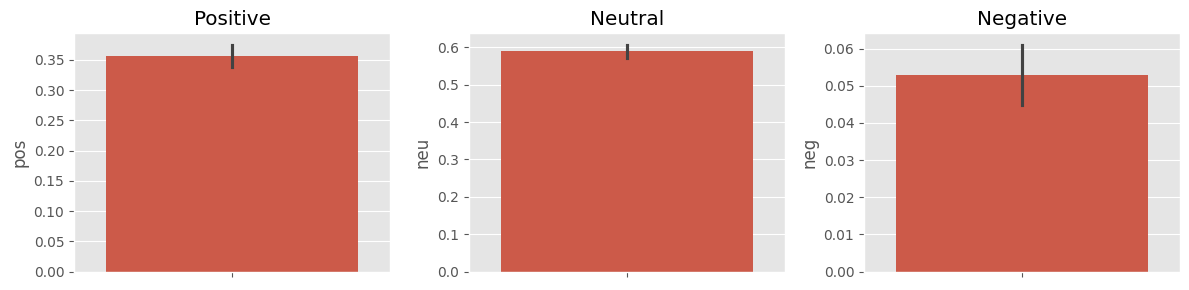

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, y='pos', ax=axs[0])
sns.barplot(data=vaders, y='neu', ax=axs[1])
sns.barplot(data=vaders, y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [32]:

from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [33]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [34]:
# Assuming 'example' is your text input and 'tokenizer' and 'model' have been initialized as TensorFlow models
encoded_text = tokenizer(example, return_tensors='tf')
output = model(encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores_dict)

{'roberta_neg': 0.020687342, 'roberta_neu': 0.57369536, 'roberta_pos': 0.40561727}


In [35]:
def polarity_scores_roberta(example, tokenizer, model):
    # Encode the text for TensorFlow
    encoded_text = tokenizer(example, return_tensors='tf')

    # Pass the encoded text to the model
    output = model(encoded_text)

    # Extract the logits and apply softmax
    scores = output[0][0].numpy()
    scores = softmax(scores)

    # Create a dictionary of scores
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [37]:
res = {}
for myid in tqdm(df.index):
    text = df.loc[myid, 'Reviews']

    try:

        # RoBERTa Sentiment Analysis
        roberta_result = polarity_scores_roberta(text, tokenizer, model)  # Ensure tokenizer and model are defined

        res[myid] = roberta_result

    except Exception as e:
        print(f'Broke for id {myid}: {str(e)}')

  0%|          | 0/1181 [00:00<?, ?it/s]

In [38]:
res

{0: {'roberta_neg': 0.05337435,
  'roberta_neu': 0.51092356,
  'roberta_pos': 0.4357021},
 1: {'roberta_neg': 0.2292323,
  'roberta_neu': 0.66106504,
  'roberta_pos': 0.109702654},
 2: {'roberta_neg': 0.6840739,
  'roberta_neu': 0.2903656,
  'roberta_pos': 0.025560452},
 3: {'roberta_neg': 0.04506965,
  'roberta_neu': 0.76474005,
  'roberta_pos': 0.19019036},
 4: {'roberta_neg': 0.0850474,
  'roberta_neu': 0.7608213,
  'roberta_pos': 0.15413134},
 5: {'roberta_neg': 0.020687342,
  'roberta_neu': 0.57369536,
  'roberta_pos': 0.40561727},
 6: {'roberta_neg': 0.09619705,
  'roberta_neu': 0.85583407,
  'roberta_pos': 0.0479689},
 7: {'roberta_neg': 0.04506965,
  'roberta_neu': 0.76474005,
  'roberta_pos': 0.19019036},
 8: {'roberta_neg': 0.0850474,
  'roberta_neu': 0.7608213,
  'roberta_pos': 0.15413134},
 9: {'roberta_neg': 0.23997469,
  'roberta_neu': 0.5949915,
  'roberta_pos': 0.16503379},
 10: {'roberta_neg': 0.020687342,
  'roberta_neu': 0.57369536,
  'roberta_pos': 0.40561727},
 11:

In [39]:
robert = pd.DataFrame(res).T
robert = robert.reset_index().rename(columns={'index': 'index'})
robert = robert.merge(df, how='left')

In [40]:
robert

,index,roberta_neg,roberta_neu,roberta_pos,Reviews
0,0,0.053374,0.510924,0.435702,settings perfect hair types
1,1,0.229232,0.661065,0.109703,lots settings
2,2,0.684074,0.290366,0.025560,heating element died
3,3,0.045070,0.764740,0.190190,also diffuser stay
4,4,0.085047,0.760821,0.154131,wo stay flys see one work
...,...,...,...,...,...
1176,1176,0.124603,0.705495,0.169902,top longer stays
1177,1177,0.606171,0.366828,0.027000,unfortunately one lids fit
1178,1178,0.679216,0.288361,0.032424,cheap enough husband loses one wo cry
1179,1179,0.242286,0.634330,0.123384,economical price


In [66]:
robert_mx=robert.join(q)

In [70]:
robert_mx

,roberta_neg,roberta_neu,roberta_pos,Reviews,Aspect
0,0.053374,0.510924,0.435702,settings perfect hair types,Adaptability
1,0.229232,0.661065,0.109703,lots settings,Adaptability
2,0.684074,0.290366,0.025560,heating element died,Durability
3,0.045070,0.764740,0.190190,also diffuser stay,Ease of Use
4,0.085047,0.760821,0.154131,wo stay flys see one work,Ease of Use
...,...,...,...,...,...
1176,0.124603,0.705495,0.169902,top longer stays,Performance
1177,0.606171,0.366828,0.027000,unfortunately one lids fit,Performance
1178,0.679216,0.288361,0.032424,cheap enough husband loses one wo cry,Price
1179,0.242286,0.634330,0.123384,economical price,Price


In [69]:
robert_mx=robert_mx.drop(columns=['index'])

In [68]:
robert_mx.to_csv("robert_mx.csv", index=False)

In [51]:
# make 2 df 1 with negitive balue more than 0.4 and everything else in other df

robert_neg = robert[robert['roberta_neg'] >= 0.4]


In [50]:
robert_pos

,index,roberta_neg,roberta_neu,roberta_pos,Reviews
0,0,0.053374,0.510924,0.435702,settings perfect hair types
1,1,0.229232,0.661065,0.109703,lots settings
3,3,0.045070,0.764740,0.190190,also diffuser stay
4,4,0.085047,0.760821,0.154131,wo stay flys see one work
5,5,0.020687,0.573695,0.405617,complaint concentrator fit perfectly pop middl...
...,...,...,...,...,...
1174,1174,0.156318,0.631782,0.211900,lid screws nicely never leaks smooth lips
1175,1175,0.017695,0.365546,0.616758,keeps hot quite
1176,1176,0.124603,0.705495,0.169902,top longer stays
1179,1179,0.242286,0.634330,0.123384,economical price


In [61]:
robert_pos = robert[robert['roberta_neg'] < 0.4]

In [44]:
len(robert_neg)

153

In [62]:
robert_pos

,index,roberta_neg,roberta_neu,roberta_pos,Reviews
0,0,0.053374,0.510924,0.435702,settings perfect hair types
1,1,0.229232,0.661065,0.109703,lots settings
3,3,0.045070,0.764740,0.190190,also diffuser stay
4,4,0.085047,0.760821,0.154131,wo stay flys see one work
5,5,0.020687,0.573695,0.405617,complaint concentrator fit perfectly pop middl...
...,...,...,...,...,...
1174,1174,0.156318,0.631782,0.211900,lid screws nicely never leaks smooth lips
1175,1175,0.017695,0.365546,0.616758,keeps hot quite
1176,1176,0.124603,0.705495,0.169902,top longer stays
1179,1179,0.242286,0.634330,0.123384,economical price


In [46]:
x=len(robert_neg)/(len(robert_neg)+len(robert_pos))
x

0.12955122777307368

In [48]:
robert_neg=robert_neg.add(amazon["Aspect"])

In [63]:
robert_pos=pd.join([amazon,robert_pos] )

AttributeError: module 'pandas' has no attribute 'join'

In [60]:
robert_pos

,Reviews,Aspect,index,roberta_neg,roberta_neu,roberta_pos
0,The settings are perfect for all hair types,Adaptability,NaN,NaN,NaN,NaN
1,with lots of settings,Adaptability,NaN,NaN,NaN,NaN
2,heating element has died,Durability,NaN,NaN,NaN,NaN
3,"Also, the diffuser does not stay on at all.",Ease of Use,NaN,NaN,NaN,NaN
4,and it won't stay on it at all. Just flys off....,Ease of Use,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1174,lid screws nicely never leaks smooth lips,NaN,1174.0,0.156318,0.631782,0.211900
1175,keeps hot quite,NaN,1175.0,0.017695,0.365546,0.616758
1176,top longer stays,NaN,1176.0,0.124603,0.705495,0.169902
1179,economical price,NaN,1179.0,0.242286,0.634330,0.123384


In [ ]:
robert_neg.to_csv('roberta_neg.csv')

In [ ]:
robert_pos.to_csv('roberta_pos.csv')